<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Response-variable-for-classification" data-toc-modified-id="Response-variable-for-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Response variable for classification</a></span><ul class="toc-item"><li><span><a href="#Summarize-gas-emissions-by-cities" data-toc-modified-id="Summarize-gas-emissions-by-cities-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summarize gas emissions by cities</a></span></li><li><span><a href="#Creation-of-response-variable" data-toc-modified-id="Creation-of-response-variable-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creation of response variable</a></span></li><li><span><a href="#Standardize-dataset" data-toc-modified-id="Standardize-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Standardize dataset</a></span></li><li><span><a href="#Impute-missing-values" data-toc-modified-id="Impute-missing-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Impute missing values</a></span><ul class="toc-item"><li><span><a href="#Simple-imputation-using-mean" data-toc-modified-id="Simple-imputation-using-mean-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Simple imputation using mean</a></span></li><li><span><a href="#Multiple-imputation" data-toc-modified-id="Multiple-imputation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Multiple imputation</a></span></li><li><span><a href="#Nearest-neighbors-imputation" data-toc-modified-id="Nearest-neighbors-imputation-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Nearest neighbors imputation</a></span></li></ul></li></ul></li><li><span><a href="#Unsupervised-classification" data-toc-modified-id="Unsupervised-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Unsupervised classification</a></span><ul class="toc-item"><li><span><a href="#Kmeans-classification" data-toc-modified-id="Kmeans-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Kmeans classification</a></span><ul class="toc-item"><li><span><a href="#Silhouette" data-toc-modified-id="Silhouette-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Silhouette</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Supervised-classification" data-toc-modified-id="Supervised-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Supervised classification</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-dataset" data-toc-modified-id="Standardizing-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standardizing the dataset</a></span></li><li><span><a href="#Split-Data-for-train-and-test-the-model" data-toc-modified-id="Split-Data-for-train-and-test-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Split Data for train and test the model</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random forest</a></span><ul class="toc-item"><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Binary classification</a></span></li><li><span><a href="#Multiple-classification" data-toc-modified-id="Multiple-classification-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Multiple classification</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/02_output/01_DatatoModel.csv', sep=',')#, index_col = [''])
data.drop(['Unnamed: 0','OWID_iso_code'], axis = 1, inplace = True)

#print(data.shape,data.columns)
data

,Country Code,City,Year,Country Name,CDP_TotalEmissions,CDP_Longitude,CDP_Latitude,OWID_co2,OWID_co2_growth_prct,OWID_co2_growth_abs,...,City_Judicial Effectiveness,City_Tax Burden,City_Government Spending,City_Fiscal Health,City_Business Freedom,City_Labor Freedom,City_Monetary Freedom,City_Trade Freedom,City_Investment Freedom,City_Financial Freedom
0,ALB,Tirana,2017,Albania,610773.00,19.818700,41.32750,5.404,20.212,0.909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,Arequito,2019,Argentina,12128.27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARG,Arias,2019,Argentina,95216.71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Armstrong,2019,Argentina,52083.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,Arteaga,2019,Argentina,27857.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,VEN,Caracas,2017,Venezuela,17774776.00,-66.803719,10.46964,146.673,-10.121,-16.517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,VNM,Dong Hoi,2019,Vietnam,424089.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,VNM,Ho Chi Minh,2017,Vietnam,30012000.00,106.660000,10.76260,182.584,-1.536,-2.848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,VNM,Ho Chi Minh,2018,Vietnam,35115325.00,106.660000,10.76260,211.774,15.987,29.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Response variable for classification

### Summarize gas emissions by cities

The year percentage of change was calculated for each city using the pct_change function  

pct_change = $\frac{(A_1 - A_0)}{A_0}$ 

When no more than one year is found pct_change was fixed to 0 (no change).  
Positive values means a reduction in gas emission, 0 means no movement and negative values means no reduction

In [3]:
pd.set_option('display.max_rows', None)
data['pct_change'] = data.groupby(['Country Code','City'])['CDP_TotalEmissions'].pct_change().round(1)
data['pct_change'].fillna(0,inplace = True)

<font color='red'> 
**To review   
Need to evaluate and decide if inconsistent data will be deleted, here values are deleted if are greater than 5 or lower than -5** 
</font>

Inconsistent values in TotalEmissions, when change in percentage is greater than 5 or lower than -5, values were removed and marked in the inconsistent column

In [4]:
data['inconsistent'] = np.where((data['pct_change'] > 5) | (data['pct_change'] < -5) , 
                                1, 0)

data['pct_change2'] = np.where((data['pct_change'] > 5) | (data['pct_change'] < -5),
                              np.nan, data['pct_change'])

data[['Country Code','City','Year','CDP_TotalEmissions','pct_change','pct_change2', 'inconsistent']]

,Country Code,City,Year,CDP_TotalEmissions,pct_change,pct_change2,inconsistent
0,ALB,Tirana,2017,6.107730e+05,0.0,0.0,0
1,ARG,Arequito,2019,1.212827e+04,0.0,0.0,0
2,ARG,Arias,2019,9.521671e+04,0.0,0.0,0
3,ARG,Armstrong,2019,5.208305e+04,0.0,0.0,0
4,ARG,Arteaga,2019,2.785738e+04,0.0,0.0,0
5,ARG,Avellaneda,2019,1.533903e+06,0.0,0.0,0
6,ARG,Bell Ville,2019,9.680611e+04,0.0,0.0,0
7,ARG,Bragado,2019,6.685458e+05,0.0,0.0,0
8,ARG,Buenos Aires,2013,9.813933e+06,0.0,0.0,0
9,ARG,Buenos Aires,2014,9.886932e+06,0.0,0.0,0


Values are summarize to have one value by city, using the mean of all available years for all columns 

In [6]:
data.drop('pct_change', axis = 1, inplace = True)
data_reduced = data.groupby(['Country Code','Country Name','City']).mean().reset_index()
data_reduced.drop('Year', axis = 1, inplace = True)
data_reduced.shape

(521, 85)

In [7]:
data_reduced['inconsistent'].value_counts()

0.000000    500
0.333333      7
0.166667      5
0.500000      4
0.142857      2
0.200000      2
0.250000      1
Name: inconsistent, dtype: int64

In [ ]:
#data.loc[data['pct_change']<0.5]
#data.loc[data['City'] == "Florianopolis"]

In [8]:
data_reduced[['CDP_TotalEmissions','pct_change2']].describe()

,CDP_TotalEmissions,pct_change2
count,5.210000e+02,521.000000
mean,8.929169e+06,0.000208
std,4.289630e+07,0.105520
min,3.425000e+01,-0.500000
25%,3.430175e+05,0.000000
50%,1.216253e+06,0.000000
75%,4.762364e+06,0.000000
max,6.863534e+08,1.100000


(0.0, 10000000.0)

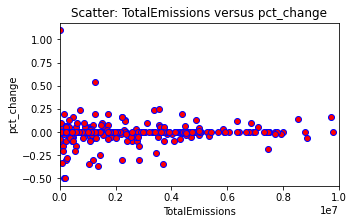

In [9]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax1.scatter(x=data_reduced['CDP_TotalEmissions'], 
            y=data_reduced['pct_change2'], 
            marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: TotalEmissions versus pct_change')
ax1.set_xlabel('TotalEmissions')
ax1.set_ylabel('pct_change')
ax1.set_xlim(xmin=0, xmax=10000000)

### Creation of response variable

1-Binary classification with cities with a percentage change lower than 30%

<font color='red'> 
**To review   
Cutting point for binary classification, here only cities that had a reduction in their emissions are classified as 1 which means, 'In process to reduce gas emissions'** 

Additional criteria can be used to define this group
</font>

In [10]:
data_reduced['Classif'] = np.where(#(data_reduced['CDP_TotalEmissions'] >= 30000) & 
                                   (data_reduced['pct_change2'] > 0), 1, 0)
data_reduced['Classif'].value_counts()

0    434
1     87
Name: Classif, dtype: int64

2-Multiple categories for classification of cities

<font color='red'> 
**To review   
Cutting points for multiple classification** 

- cities are classified as 1 if they have at least 1 inconsistent value across the years 
- cities that had a reduction in their emissions are classified as 1 which means, 'In process to reduce gas emissions'
- cities that had no movement or only one value are classified in group 3  
- cities that increase their emissions are in group 4


Additional criteria can be used to define this group
</font>

In [11]:
data_reduced['CategClassif'] = np.where(data_reduced['inconsistent'] > 0, 1, 
                                        np.where(#(data_reduced['CDP_TotalEmissions'] < 350000) & 
                                            (data_reduced['pct_change2'] > 0), 2, 
                                       np.where(#((data_reduced['CDP_TotalEmissions'] < 4500000) & (data_reduced['CDP_TotalEmissions'] >=350000)) & 
                                   ((data_reduced['pct_change2'] == 0)), 3,
                                       np.where(#((data_reduced['CDP_TotalEmissions'] < 4500000) & (data_reduced['CDP_TotalEmissions'] >=350000)) & 
                                   (data_reduced['pct_change2'] < 0), 4, 
                                               5))))
data_reduced['CategClassif'].value_counts()

3    339
2     85
4     76
1     21
Name: CategClassif, dtype: int64

Names and geografical location are excluded from the model

In [12]:
data_model = data_reduced.drop(['Country Code', 'Country Name', 'City', 
                               'CDP_Latitude', 'CDP_Longitude'], axis = 1)

data_model.head()

,CDP_TotalEmissions,OWID_co2,OWID_co2_growth_prct,OWID_co2_growth_abs,OWID_consumption_co2,OWID_trade_co2,OWID_trade_co2_share,OWID_co2_per_capita,OWID_consumption_co2_per_capita,OWID_share_global_co2,...,City_Business Freedom,City_Labor Freedom,City_Monetary Freedom,City_Trade Freedom,City_Investment Freedom,City_Financial Freedom,inconsistent,pct_change2,Classif,CategClassif
0,610773.00,5.404,20.212,0.909,6.186,0.782,14.462,1.874,2.145,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,3
1,68091232.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,3
2,12128.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,3
3,95216.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,3
4,52083.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,3


<font color='red'> 
**To review   
Select variables to include in the model** 

Here are included all variables, just the 2 types of classifications, the number of emissions and the percentage in change are not included

</font>

In [50]:
data_toImpute = data_model.loc[:, 'OWID_co2':'City_Financial Freedom'].values
Response = data_model.loc[:, ['Classif','CategClassif', 'CDP_TotalEmissions','pct_change2']]

In [25]:
from sklearn.preprocessing import StandardScaler

#simple imputation
from sklearn.impute import SimpleImputer

#multiple imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#knn imputation
from sklearn.impute import KNNImputer

### Standardize dataset

In [51]:
sc = StandardScaler()
data_model_stand = sc.fit_transform(data_toImpute)
data_model_stand

array([[-0.86742482,  6.37050057, -0.10069348, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.67822452,  0.46002699,  0.01031079, ...,         nan,
                nan,         nan],
       [-0.67670962, -0.13808404, -0.15397903, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

### Impute missing values

<font color='red'> 
**To review   
Decide which type of imputation will be used**


- Simple imputation:  mean, most frequent value
- Multiple imputation
- K nearest neighbord
</font>

#### Simple imputation using mean

In [52]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_model_simple = imp.fit_transform(data_model_stand)
data_model_simple

array([[-8.67424825e-01,  6.37050057e+00, -1.00693480e-01, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16],
       [ 4.33257766e-17,  1.08314441e-17,  0.00000000e+00, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16],
       [ 4.33257766e-17,  1.08314441e-17,  0.00000000e+00, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16],
       ...,
       [-6.78224520e-01,  4.60026991e-01,  1.03107880e-02, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16],
       [-6.76709617e-01, -1.38084045e-01, -1.53979026e-01, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16],
       [ 4.33257766e-17,  1.08314441e-17,  0.00000000e+00, ...,
         2.17252275e-16, -1.05431251e-16, -2.87539776e-16]])

#### Multiple imputation

In [53]:
imp = IterativeImputer(max_iter=10, random_state=0)
data_model_multiple = imp.fit_transform(data_model_stand)
data_model_multiple

/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


array([[-8.67424825e-01,  6.37050057e+00, -1.00693480e-01, ...,
        -1.22942432e-01, -2.35705416e-01, -2.55380899e-01],
       [-1.28782037e-04, -1.49453744e-01, -2.80796670e-02, ...,
         6.80674661e-02,  2.59247693e-01,  2.29153266e-01],
       [ 2.78231798e-04, -9.73858153e-01, -2.69987294e-02, ...,
        -1.80992316e+00, -1.29281941e+00, -1.16950816e+00],
       ...,
       [-6.78224520e-01,  4.60026991e-01,  1.03107880e-02, ...,
        -1.50166734e+00, -1.46951642e+00, -4.83251867e-01],
       [-6.76709617e-01, -1.38084045e-01, -1.53979026e-01, ...,
        -1.31513540e+00, -1.43888115e+00, -5.61159539e-01],
       [ 2.31129049e-04,  2.01168935e-01,  4.04893687e-02, ...,
        -7.08880392e-01, -8.10008146e-01, -6.97281931e-01]])

In [47]:
np.where(np.isnan(data_model_simple))

(array([], dtype=int64), array([], dtype=int64))

#### Nearest neighbors imputation 

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. For more information on the methodology, see ref. [OL2001].

In [54]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_model_knn = imputer.fit_transform(data_model_stand)
data_model_knn

array([[-0.86742482,  6.37050057, -0.10069348, ..., -0.52663295,
        -0.70385029, -0.79479699],
       [-0.79621107,  0.81571099, -0.03506368, ...,  0.2221722 ,
         0.02015268, -0.38949457],
       [-0.79292087, -0.4953157 , -0.1632476 , ..., -2.92098307,
        -2.11565609, -1.84858328],
       ...,
       [-0.67822452,  0.46002699,  0.01031079, ..., -1.56156689,
        -1.83510493, -0.79479699],
       [-0.67670962, -0.13808404, -0.15397903, ..., -1.56156689,
        -1.83510493, -0.79479699],
       [-0.70203883, -0.64420852, -0.22546507, ..., -0.54489649,
        -0.52284955, -0.9298978 ]])

In [49]:
np.where(np.isnan(data_model_knn))

(array([], dtype=int64), array([], dtype=int64))

## Unsupervised classification

In [55]:
#select here imputed data to use
data_toClass = data_model_multiple
data_toClass

array([[-8.67424825e-01,  6.37050057e+00, -1.00693480e-01, ...,
        -1.22942432e-01, -2.35705416e-01, -2.55380899e-01],
       [-1.28782037e-04, -1.49453744e-01, -2.80796670e-02, ...,
         6.80674661e-02,  2.59247693e-01,  2.29153266e-01],
       [ 2.78231798e-04, -9.73858153e-01, -2.69987294e-02, ...,
        -1.80992316e+00, -1.29281941e+00, -1.16950816e+00],
       ...,
       [-6.78224520e-01,  4.60026991e-01,  1.03107880e-02, ...,
        -1.50166734e+00, -1.46951642e+00, -4.83251867e-01],
       [-6.76709617e-01, -1.38084045e-01, -1.53979026e-01, ...,
        -1.31513540e+00, -1.43888115e+00, -5.61159539e-01],
       [ 2.31129049e-04,  2.01168935e-01,  4.04893687e-02, ...,
        -7.08880392e-01, -8.10008146e-01, -6.97281931e-01]])

### Kmeans classification

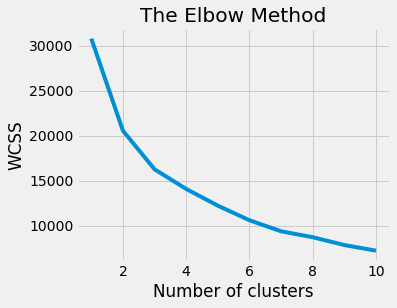

In [71]:
# find the appropriate cluster number
plt.figure(figsize=(5, 4))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_toClass)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
#identify number of clusters
n_clusters = 4

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
preprocessor = Pipeline(
       [("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42))])

In [73]:
clusterer = Pipeline(
      [
           (
              "kmeans",
              KMeans(
                  n_clusters=n_clusters,
                  init="k-means++",
                  n_init=50,
                  max_iter=500,
                  random_state=42,
            ),
        ),
    ]
 )

In [74]:
pipe = Pipeline(
        [("preprocessor", preprocessor),
         ("clusterer", clusterer)])

In [75]:
pipe.fit(data_toClass)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [62]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
preprocessed_data = pipe["preprocessor"].transform(data_toClass)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.7226058156349968

In [64]:
true_label_names = Response['CategClassif']
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

In [65]:
adjusted_rand_score(true_labels, predicted_labels)

0.21083321351981954

In [66]:
label_encoder.classes_

array([1, 2, 3, 4])

In [67]:
n_clusters = len(label_encoder.classes_)

#### Silhouette

/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


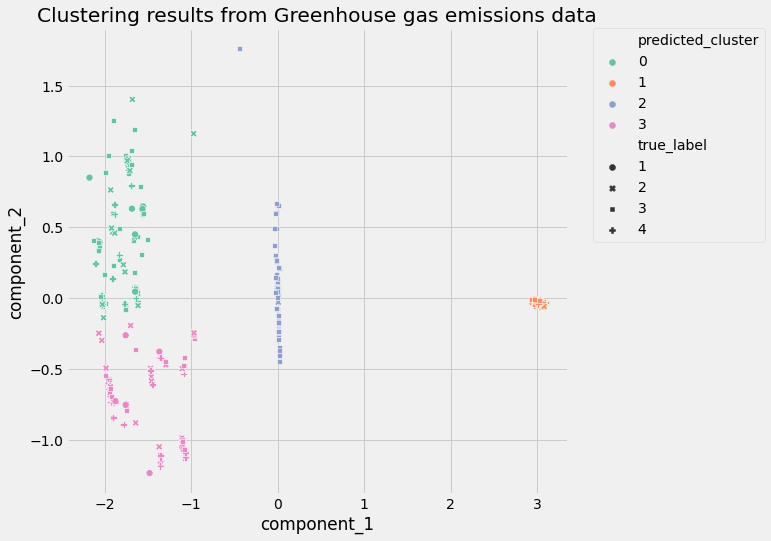

In [78]:
import seaborn as sns

pcadf = pd.DataFrame(
   pipe["preprocessor"].transform(data_toClass),
        columns=["component_1", "component_2"],
   )
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
     "component_1",
     "component_2",
     s=50,
     data=pcadf,
     hue="predicted_cluster",
     style="true_label",
     palette="Set2",
)

scat.set_title(
    "Clustering results from Greenhouse gas emissions data"
 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

## Supervised classification

In [79]:
X = data_toClass
y = Response
print(X.shape, y.shape)

(521, 77) (521, 4)


### Split Data for train and test the model

In [80]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

33% of the data is selected for test the model, random_state = 1 allows reproducibility in the selection

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train
y_train

(349, 77) (172, 77) (349, 4) (172, 4)


,Classif,CategClassif,CDP_TotalEmissions,pct_change2
295,0,3,8.014366e+06,0.000000
345,0,4,4.855500e+02,-0.080000
285,0,3,5.706660e+05,0.000000
127,0,4,2.562581e+06,-0.016667
82,1,2,1.082862e+06,0.050000
483,0,3,5.418982e+06,0.000000
448,0,4,1.135259e+06,-0.033333
27,0,3,5.260315e+04,0.000000
89,1,2,1.258134e+06,0.542857
407,0,3,3.476350e+05,0.000000


### Random forest

#### Binary classification

In [83]:
y1_train = y_train.iloc[:,0]
y1_test = y_test.iloc[:,0]
y1_train

295    0
345    0
285    0
127    0
82     1
483    0
448    0
27     0
89     1
407    0
73     0
392    0
171    0
161    1
69     0
268    0
91     0
250    0
204    0
397    0
125    0
255    0
424    0
59     0
120    1
12     0
507    0
237    0
447    0
520    0
426    0
157    0
351    1
186    0
277    0
245    0
427    0
247    0
223    0
497    1
207    1
509    0
244    0
208    0
88     0
501    0
131    0
124    1
174    1
504    0
191    0
14     0
430    0
499    0
123    0
138    0
111    1
51     0
368    0
112    0
9      1
19     0
16     0
410    0
0      0
364    0
105    0
286    0
420    0
512    0
328    0
389    0
230    0
446    1
70     1
412    0
479    0
292    0
38     0
150    0
306    1
480    0
163    0
167    0
411    1
206    0
188    1
145    0
284    0
449    0
417    0
360    0
379    0
425    0
314    1
293    0
341    0
175    0
433    1
375    0
229    0
290    0
228    0
100    1
423    0
53     0
227    0
492    0
519    0
154    0
251    1
2

- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  
- random_state: Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

In [84]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)
model1.fit(X_train, y1_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [85]:
from sklearn import metrics
# make predictions
yhat1 = model1.predict(X_test)
# evaluate predictions
mae1 = metrics.mean_absolute_error(y1_test, yhat1)
print('MAE1: %.3f' % mae1)

MAE1: 0.151


In [86]:
round(model1.score(X_train,y1_train), 4)

0.8711

In [87]:
round(model1.score(X_test,y1_test), 4)

0.8488

In [88]:
print(metrics.confusion_matrix(y1_test, yhat1))
print(metrics.classification_report(y1_test, yhat1))
print(metrics.accuracy_score(y1_test, yhat1))

[[145   2]
 [ 24   1]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.33      0.04      0.07        25

    accuracy                           0.85       172
   macro avg       0.60      0.51      0.49       172
weighted avg       0.78      0.85      0.79       172

0.8488372093023255


#### Multiple classification

In [89]:
y2_train = y_train.iloc[:,1]
y2_test = y_test.iloc[:,1]
y2_train

295    3
345    4
285    3
127    4
82     2
483    3
448    4
27     3
89     2
407    3
73     3
392    3
171    3
161    2
69     3
268    3
91     3
250    3
204    4
397    3
125    3
255    3
424    1
59     3
120    2
12     3
507    3
237    3
447    3
520    3
426    3
157    3
351    2
186    3
277    3
245    3
427    3
247    3
223    3
497    2
207    2
509    3
244    1
208    3
88     3
501    3
131    4
124    2
174    2
504    3
191    3
14     3
430    3
499    4
123    3
138    3
111    2
51     3
368    3
112    3
9      2
19     3
16     4
410    3
0      3
364    3
105    3
286    4
420    3
512    3
328    3
389    3
230    4
446    2
70     2
412    3
479    3
292    4
38     3
150    1
306    2
480    3
163    3
167    3
411    2
206    3
188    2
145    3
284    3
449    3
417    3
360    3
379    3
425    4
314    2
293    3
341    3
175    3
433    2
375    4
229    3
290    4
228    3
100    2
423    3
53     3
227    3
492    3
519    3
154    3
251    2
2

In [90]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)
model2.fit(X_train, y2_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [91]:
from sklearn.metrics import mean_absolute_error
# make predictions
yhat2 = model2.predict(X_test)
# evaluate predictions
mae2 = mean_absolute_error(y2_test, yhat2)
print('MAE2: %.3f' % mae2)

MAE2: 0.430


In [92]:
round(model2.score(X_train,y2_train), 4)

0.7593

In [93]:
round(model2.score(X_test,y2_test), 4)

0.657

In [94]:
print(metrics.confusion_matrix(y2_test,yhat2))
print(metrics.classification_report(y2_test,yhat2))
print(metrics.accuracy_score(y2_test, yhat2))

[[  0   2   6   0]
 [  0   5  19   0]
 [  0   3 107   1]
 [  0   9  19   1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.26      0.21      0.23        24
           3       0.71      0.96      0.82       111
           4       0.50      0.03      0.06        29

    accuracy                           0.66       172
   macro avg       0.37      0.30      0.28       172
weighted avg       0.58      0.66      0.57       172

0.6569767441860465


/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
